# How can a country be more generous?

In the previous analysis, we showed that the `Generosity` is the best area the UAE could improve.

In this survey, a person was considered generous depending how she answer the three following questions:

In the past month do you
- helped a stranger, or someone they didn’t know who needed help?
- donated money to a charity?
- volunteered your time to an organisation?

But, which public policies can be created to elevate the generosity of a population? 

I believe that the first step is to identify the countries by its generosity. Thus, this notebook will use Time Series Clustering to identify the groups of countries by its generosity trend.

Finally, it will show the UAE trend of generosity among all groups. We hope this charts will help to identify countries which have good public policies that may also be used in the UAE.

source: https://www.cafonline.org/docs/default-source/about-us-publications/caf_worldgivingindex2015_report.pdf?sfvrsn=2

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

In [2]:
def plot_ts(df, group, must):
    random.seed(2021)

    group_df = df.loc[df["group"] == group].copy()
    group_df.drop(columns="group", inplace=True)
    group_df["avg"] = group_df.apply(lambda r: np.mean(r), axis=1)
    
    # selects the top 5 countries in a group
    countries = group_df.sort_values(by="avg", ascending=False) \
                        .index \
                        .tolist()[:5]
    
    group_df.drop(columns="avg", inplace=True)

    # adds UAE to the chart
    if must in countries:
        countries.remove(must)
    else:
        must_df = df.loc[[must]]
        must_df.drop(columns="group", inplace=True)
        group_df = pd.concat([group_df, must_df], axis=0)
    if len(countries) > 4:
        sample = random.sample(countries, k=4)
    else:
        sample = countries
    sample.append(must)
        
    group_df = group_df.reset_index() \
                   .melt(id_vars="Country name", var_name="Year", value_name=FEATURE) \
                   .set_index("Country name")

    plt.figure(figsize=(12,7))
    for s in sample:
        temp = group_df.loc[s]
        plt.plot(temp["Year"], temp[FEATURE], label=s)
    plt.legend()
    plt.show()

In [3]:
UAE = "United Arab Emirates"
FEATURE = "Generosity"

In [4]:
df = pd.read_csv("data/prepared.csv")

In [5]:
df

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,3.983,7.702,0.529,53.200,0.389,0.080,0.881
1,Afghanistan,2016,4.220,7.697,0.559,53.000,0.523,0.042,0.793
2,Afghanistan,2017,2.662,7.697,0.491,52.800,0.427,-0.121,0.954
3,Afghanistan,2018,2.694,7.692,0.508,52.600,0.374,-0.094,0.928
4,Afghanistan,2019,2.375,7.697,0.420,52.400,0.394,-0.108,0.924
...,...,...,...,...,...,...,...,...,...
957,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
958,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
959,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167
960,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


## Specific Preparation

In [6]:
df = df.set_index(["Country name", "year"])

In [7]:
df.loc[pd.isna(df[FEATURE])]

Ladder score  Logged GDP per capita  \
Country name              year                                        
Algeria                   2016         5.341                  9.362   
Cyprus                    2020         6.260                    NaN   
Hong Kong S.A.R. of China 2020         5.295                    NaN   
Iceland                   2019         7.533                 10.931   
Iran                      2018         4.278                    NaN   
                          2019         5.006                    NaN   
                          2020         4.865                    NaN   
Kosovo                    2020         6.294                    NaN   
Malta                     2020         6.157                    NaN   
North Cyprus              2015         5.843                    NaN   
                          2016         5.827                    NaN   
                          2018         5.608                    NaN   
                          2019         5.467                    NaN   
Palestinian Territories   2018         4.554                    NaN   
                          2019         4.483                    NaN   
Qatar                     2015         6.375                 11.486   
Somalia                   2015         5.354                    NaN   
                          2016         4.668                    NaN   
South Sudan               2015         4.071                    NaN   
                          2016         2.888                    NaN   
                          2017         2.817                    NaN   
Taiwan Province of China  2018         6.467                    NaN   
                          2019         6.537                    NaN   
                          2020         6.751                    NaN   
Venezuela                 2018         5.006                    NaN   
                          2019         5.081                    NaN   
                          2020         4.574                    NaN   
Vietnam                   2017         5.175                  8.876   
Yemen                     2018         3.058                    NaN   
                          2019         4.197                    NaN   

                                Social support  Healthy life expectancy  \
Country name              year                                            
Algeria                   2016           0.749                     65.5   
Cyprus                    2020           0.806                     74.1   
Hong Kong S.A.R. of China 2020           0.813                      NaN   
Iceland                   2019           0.982                     73.0   
Iran                      2018           0.674                     66.0   
                          2019           0.698                     66.3   
                          2020           0.757                     66.6   
Kosovo                    2020           0.792                      NaN   
Malta                     2020           0.938                     72.2   
North Cyprus              2015           0.791                      NaN   
                          2016           0.808                      NaN   
                          2018           0.837                      NaN   
                          2019           0.803                      NaN   
Palestinian Territories   2018           0.819                      NaN   
                          2019           0.833                      NaN   
Qatar                     2015             NaN                     68.3   
Somalia                   2015           0.599                     50.1   
                          2016           0.594                     50.0   
South Sudan               2015           0.585                     50.2   
                          2016           0.532                     50.6   
                          2017           0.557                     51.0   
Taiwan Province of China  2018    

In [8]:
df = df[[FEATURE]].copy()
df

Generosity
Country name year            
Afghanistan  2015       0.080
             2016       0.042
             2017      -0.121
             2018      -0.094
             2019      -0.108
...                       ...
Lesotho      2021      -0.131
Botswana     2021      -0.246
Rwanda       2021       0.061
Zimbabwe     2021      -0.047
Afghanistan  2021      -0.102

[962 rows x 1 columns]

As we are using time series data, the best approach to fill the missing values is by **interpolation**. Because we have few years to analyze, the interpolation method will be **linear**, that is, the missing field will be filled by a point that belongs to line formed by its two contiguous points.

Using too much interpolation may produce artificial data, so before use it, we will remove the countries that don't have at least 4 years of information.

source: https://en.wikipedia.org/wiki/Linear_interpolation

In [9]:
# remove countries with more than one date missing
remove = []
temp = df.reset_index()
for col in df.columns:
    t = temp[["Country name", col]].groupby("Country name").count()
    remove += t[t[col] < 4].index.tolist()
remove

['Bhutan',
 'Burundi',
 'Central African Republic',
 'Comoros',
 'Congo (Kinshasa)',
 'Jamaica',
 'Maldives',
 'North Cyprus',
 'Qatar',
 'Somalia',
 'South Sudan',
 'Swaziland',
 'Syria',
 'Trinidad and Tobago']

In [10]:
df = df[~df.index.get_level_values("Country name").isin(remove)]
df.sort_index()
df

Generosity
Country name year            
Afghanistan  2015       0.080
             2016       0.042
             2017      -0.121
             2018      -0.094
             2019      -0.108
...                       ...
Lesotho      2021      -0.131
Botswana     2021      -0.246
Rwanda       2021       0.061
Zimbabwe     2021      -0.047
Afghanistan  2021      -0.102

[930 rows x 1 columns]

### Create the missing years for each country

The countries have different missing years. The code below create the correct missing years for each country. Below, the explanation of each line of code:

1. convert country and year to columns
2. convert each year to a column, NaNs appear
3. convert country to column
4. group the several years columns to one 
5. set original index
6. sort index by country and year

In [11]:
df = df.reset_index() \
       .pivot(index="Country name", columns="year", values=FEATURE) \
       .reset_index() \
       .melt(id_vars="Country name") \
       .set_index(["Country name", "year"]) \
       .sort_index()

In [12]:
# an example with missing data
df.loc["Afghanistan"]

,value
year,
2015,0.080
2016,0.042
2017,-0.121
2018,-0.094
2019,-0.108
2020,NaN
2021,-0.102


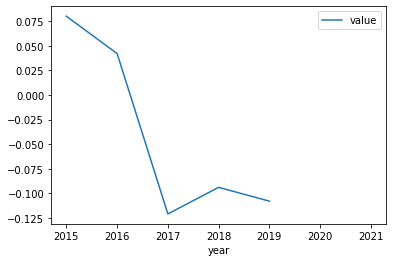

In [13]:
df.loc["Afghanistan"].plot();

In [14]:
# interpolate
df = df.interpolate(method="linear")

In [15]:
# the example after interpolation
df.loc["Afghanistan"]

,value
year,
2015,0.080
2016,0.042
2017,-0.121
2018,-0.094
2019,-0.108
2020,-0.105
2021,-0.102


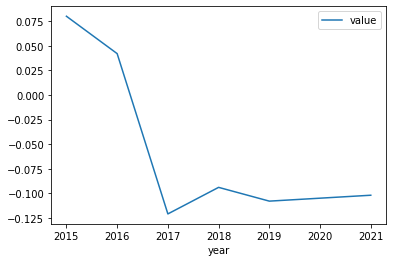

In [16]:
df.loc["Afghanistan"].plot();

Here we format the dataset in such a way that the years are now features.

In [17]:
df = df.reset_index().pivot(index="Country name", columns="year", values="value")
df

year,2015,2016,2017,2018,2019,2020,2021
Country name,,,,,,,
Afghanistan,0.080000,0.042000,-0.1210,-0.094,-0.108,-0.105,-0.102
Albania,-0.081000,-0.017000,-0.0290,0.009,-0.099,0.007,-0.030
Algeria,-0.075667,-0.121333,-0.1670,-0.146,0.005,-0.031,-0.067
Argentina,-0.174000,-0.192000,-0.1860,-0.211,-0.211,-0.122,-0.182
Armenia,-0.203000,-0.170000,-0.1470,-0.163,-0.172,-0.170,-0.168
...,...,...,...,...,...,...,...
Venezuela,-0.117000,-0.155000,-0.1690,-0.169,-0.169,-0.169,-0.169
Vietnam,0.086000,-0.090000,-0.0655,-0.041,-0.126,-0.112,-0.098
Yemen,-0.139000,-0.151000,-0.1470,-0.147,-0.147,-0.147,-0.147


Scaling the data is particularly important for clustering, because many methods are distance-based and can be affected by different scaled values, producing unreal results.

In [18]:
mms = MinMaxScaler()
df = pd.DataFrame(mms.fit_transform(df), index=df.index, columns=df.columns)
df

year,2015,2016,2017,2018,2019,2020,2021
Country name,,,,,,,
Afghanistan,0.366667,0.325926,0.179787,0.284534,0.212941,0.190712,0.224096
Albania,0.198958,0.263492,0.277660,0.406139,0.223529,0.329412,0.310843
Algeria,0.204514,0.153086,0.130851,0.223140,0.345882,0.282353,0.266265
Argentina,0.102083,0.078307,0.110638,0.146399,0.091765,0.169659,0.127711
Armenia,0.071875,0.101587,0.152128,0.203070,0.137647,0.110217,0.144578
...,...,...,...,...,...,...,...
Venezuela,0.161458,0.117460,0.128723,0.195986,0.141176,0.111455,0.143373
Vietnam,0.372917,0.186243,0.238830,0.347107,0.191765,0.182043,0.228916
Yemen,0.138542,0.121693,0.152128,0.221960,0.167059,0.138700,0.169880


## Clustering

Before clustering we use **dimensionality reduction** in the data. There are two reasons for that. 

First, the reduction for 2 or 3 dimensions will allow us to create charts to understand how the data is grouped. Obviously, such chart will be only a **projection**, i.e., we will lose some details that could be only noticed with more dimensions.

Second, we can cluster the dimensional reduced data, making the things easier to the clustering algorithm, that will deal with less features.

To reduce the data, I opted for the **T-Distributed Stochastic Neighbor Embedding** (TSNE) algorithm. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

source: https://scikit-learn.org/stable/modules/manifold.html#t-sne

In [19]:
tsne = TSNE(n_components=2, perplexity=11, random_state=2021)
axis = pd.DataFrame(tsne.fit_transform(df), columns=["x", "y"], index=df.index)

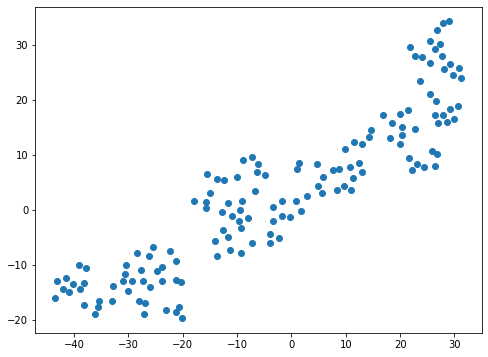

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(axis["x"], axis["y"])
c = plt.Circle(tuple(axis.loc[UAE]), 0.01, color='r')
ax.add_patch(c)
plt.show();

The clustering algorithm is the **Agglomerative Clustering**. Its performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

Some of its advantages is that the clusters may have different sizes and it works well with non-globular data (what is the case for this dataset).

The score selected to determine the best number of clusters was the **Silhouette Coefficient**. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

The Silhouette coefficient checks at the same time the distance **between clusters** and the distance **inside the cluster**.

source: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [21]:
best_score = -1
best_groups = []
best_n = 2
for n in range(4, 12):
    cl = AgglomerativeClustering(n)
    groups = cl.fit_predict(axis) 
    score = silhouette_score(axis, groups) 
    if score > best_score:
        best_score = score
        best_groups = groups
        best_n = n
axis["group"] = best_groups
df["group"] = best_groups
best_n, best_score

(4, 0.52887005)

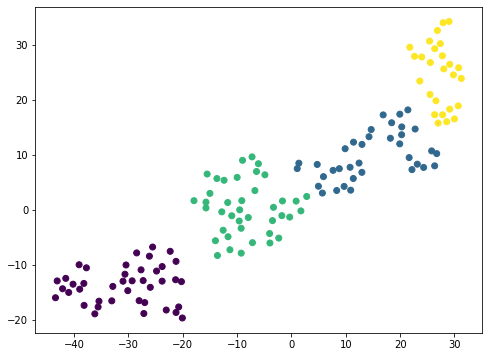

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(axis["x"], axis["y"], c=axis["group"])
c = plt.Circle(tuple(axis.loc[UAE]), 0.01, color='r')
ax.add_patch(c)
plt.show();

In [23]:
sequence = axis.sort_values(by="x")["group"].unique().tolist()
sequence

[0, 2, 1, 3]

In [24]:
axis.loc[UAE, "group"]

3

0 ['Argentina', 'Armenia', 'Azerbaijan', 'Belarus', 'Botswana', 'Bulgaria', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'France', 'Gabon', 'Georgia', 'Greece', 'Hungary', 'Japan', 'Jordan', 'Latvia', 'Lesotho', 'Lithuania', 'Mexico', 'Morocco', 'Palestinian Territories', 'Panama', 'Peru', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Slovakia', 'Tunisia', 'Turkey', 'Venezuela', 'Yemen']


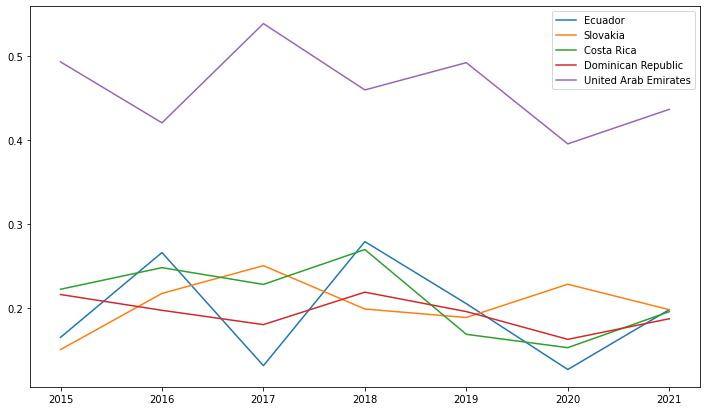

1 ['Austria', 'Bahrain', 'Bosnia and Herzegovina', 'Cambodia', 'Cameroon', 'Chad', 'Denmark', 'Ethiopia', 'Germany', 'Ghana', 'Guinea', 'Honduras', 'Hong Kong S.A.R. of China', 'India', 'Israel', 'Kyrgyzstan', 'Laos', 'Liberia', 'Malawi', 'Mongolia', 'Mozambique', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Paraguay', 'Rwanda', 'Serbia', 'Sierra Leone', 'Singapore', 'Switzerland', 'Togo', 'Uganda', 'Ukraine', 'Zambia']


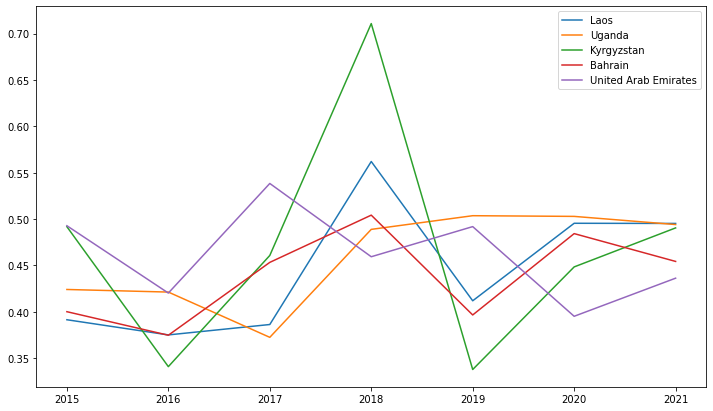

2 ['Afghanistan', 'Albania', 'Algeria', 'Bangladesh', 'Belgium', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Chile', 'Congo (Brazzaville)', 'Cyprus', 'Finland', 'Guatemala', 'Iraq', 'Italy', 'Ivory Coast', 'Kazakhstan', 'Kuwait', 'Lebanon', 'Libya', 'Luxembourg', 'Madagascar', 'Mali', 'Mauritania', 'Mauritius', 'Moldova', 'Montenegro', 'Namibia', 'Philippines', 'Senegal', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Taiwan Province of China', 'Tajikistan', 'Uruguay', 'Vietnam', 'Zimbabwe']


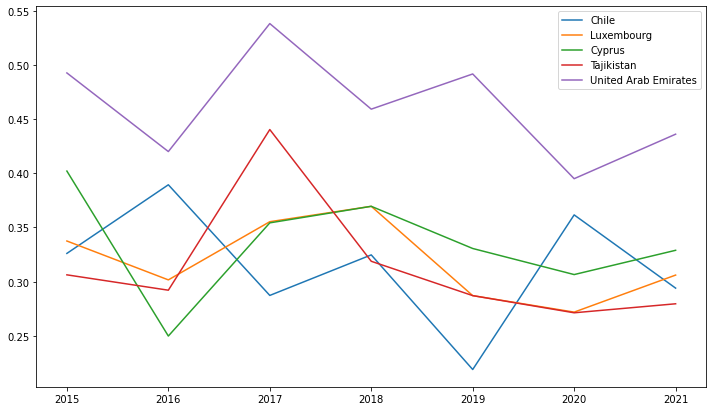

3 ['Australia', 'Canada', 'Gambia', 'Haiti', 'Iceland', 'Indonesia', 'Iran', 'Ireland', 'Kenya', 'Kosovo', 'Malaysia', 'Malta', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Norway', 'Sri Lanka', 'Sweden', 'Tanzania', 'Thailand', 'Turkmenistan', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan']


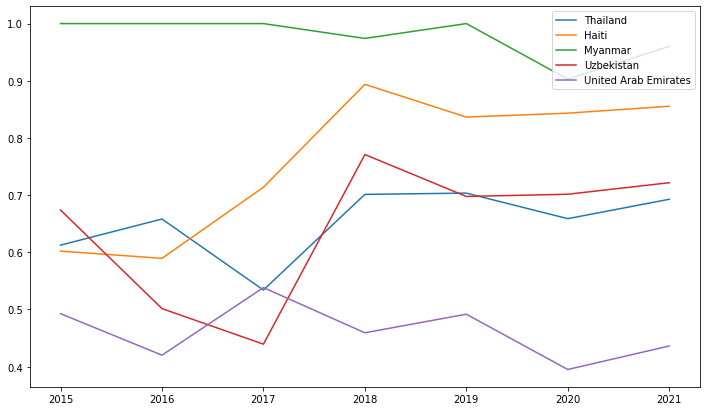

In [25]:
labels = df["group"].unique().tolist()
labels.sort()
for label in labels:
    countries = df.loc[df["group"] == label].index.tolist()
    print(label, countries)
    plot_ts(df, label, UAE)

As we can see, UAE is among the group with more generosity, such as UK, USA, Myanmar and Haiti. These countries may provide (by its culture, history, laws, or public policies) insights to improve the generosity among the UAE people.